<a href="https://colab.research.google.com/github/jennyryao/final_project/blob/main/predict_solar_rooftops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [100]:
#url = "https://raw.githubusercontent.com/jennyryao/PS4HouseDataExercise/master/train.csv"
#url = "https://drive.google.com/file/d/1K_HNMF2Gv7XkKLlMbu3Snww5syyDg-oQ/view?usp=sharing"
#url = "https://www.dropbox.com/s/l12sey5zn41zteg/df_train.csv?dl=0"
url = "https://raw.githubusercontent.com/jennyryao/final_project/main/df_test.csv"
data = pd.read_csv(url)
data.shape

#drop infinity
data.replace([np.inf, -np.inf], np.nan, inplace=True)
#data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
data = data.reset_index()
data.isnull().any().any()

train = data.iloc[:,:]
train.to_json('trainingdata.json')
train.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (132,135) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,index,Unnamed: 0,ID,total_panel_area,average_household_income,education_bachelor,education_college,education_doctoral,education_high_school_graduate,education_less_than_high_school,...,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
0,0,1,0,0.000000,70352.78987,569,1690,13,1757,336,...,39.0,11.0,13.0,34,0.0,0.0,25.0,12.0,0.0,9.46
1,1,2,3,0.000000,86840.15275,640,1116,68,1095,231,...,39.0,11.0,13.0,34,0.0,0.0,25.0,12.0,0.0,9.46
2,2,3,10,532.693615,54605.47413,658,1683,112,1281,529,...,39.0,11.0,13.0,34,0.0,0.0,25.0,12.0,0.0,9.46
3,4,5,13,0.000000,89859.90930,642,1548,45,1296,213,...,39.0,11.0,13.0,34,0.0,0.0,25.0,12.0,0.0,9.46
4,6,7,23,191.224200,54067.78063,337,809,0,612,92,...,39.0,11.0,13.0,34,0.0,0.0,25.0,12.0,0.0,9.46


# New Section

In [101]:
# investigate solar area %
train['solar_panel_area_divided_by_area']

0         0.000000
1         0.000000
2        38.912665
3         0.000000
4        33.707926
           ...    
13391     0.000000
13392     0.000000
13393     0.304756
13394     7.525935
13395     0.066825
Name: solar_panel_area_divided_by_area, Length: 13396, dtype: float64

(array([1.1878e+04, 9.0800e+02, 3.5100e+02, 1.6000e+02, 5.5000e+01,
        2.9000e+01, 1.0000e+01, 2.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([    0.      ,  1409.844493,  2819.688986,  4229.533479,
         5639.377972,  7049.222465,  8459.066958,  9868.911451,
        11278.755944, 12688.600437, 14098.44493 ]),
 <a list of 10 Patch objects>)

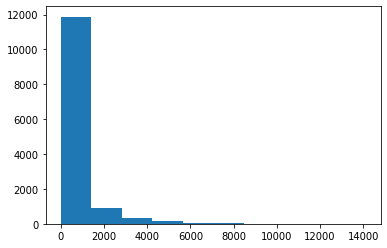

In [102]:
# plot hist
plt.hist(train['solar_panel_area_divided_by_area'])

In [103]:
# select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(13396, 148)

In [109]:
corr = numeric.corr()
cols = corr['solar_panel_area_divided_by_area'].sort_values(ascending=False)[0:10].index
cols

Index(['solar_panel_area_divided_by_area', 'incentive_count_nonresidential',
       'incentive_count_residential', 'feedin_tariff', 'daily_solar_radiation',
       'electricity_price_industrial', 'electricity_price_commercial',
       'rebate', 'heating_design_temperature', 'electricity_price_overall'],
      dtype='object')

In [110]:
# pick out X cols and Y = solar_panel_area_divided_by_area
X = train[cols]
Y = train['solar_panel_area_divided_by_area']
X = X.drop(['solar_panel_area_divided_by_area'], axis = 1)
X

,incentive_count_nonresidential,incentive_count_residential,feedin_tariff,daily_solar_radiation,electricity_price_industrial,electricity_price_commercial,rebate,heating_design_temperature,electricity_price_overall
0,39.0,34.0,0.0,3.76,7.02,9.44,0.0,-16.70,9.53
1,39.0,34.0,0.0,3.76,7.02,9.44,0.0,-16.70,9.53
2,39.0,34.0,0.0,3.76,7.02,9.44,0.0,-16.70,9.53
3,39.0,34.0,0.0,3.76,7.02,9.44,0.0,-16.70,9.53
4,39.0,34.0,0.0,3.76,7.02,9.44,0.0,-16.70,9.53
...,...,...,...,...,...,...,...,...,...
13391,22.0,13.0,0.0,3.88,6.86,9.78,0.0,-6.30,8.99
13392,22.0,13.0,0.0,3.88,6.86,9.78,0.0,-6.30,8.99
13393,54.0,47.0,0.0,4.68,5.59,8.15,0.0,-1.52,8.70
13394,54.0,47.0,0.0,4.68,5.59,8.15,0.0,-1.52,8.70


In [111]:
# build Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

In [112]:
# How good is the model
model.score(X,Y)


0.38339614939193545

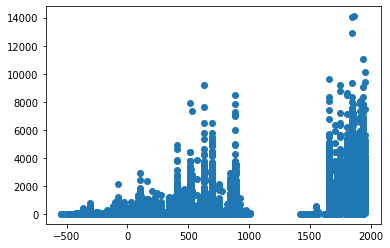

In [113]:
# Scatter plot of predictions
plt.scatter(predictions, Y)

In [132]:
# initialize list of lists
data = [['tom', 10]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Name', 'Age'])
  
# print dataframe.
df

,Name,Age
0,tom,10


In [156]:
#predict using test data
#url = "https://raw.githubusercontent.com/jennyryao/PS4HouseDataExercise/master/test.csv"
#data = pd.read_csv(url)

# initialize list of lists
input_data = [[10, 10, 10, 10, 10, 10, 10, 10, 10]]
  
# Create the pandas DataFrame
data = pd.DataFrame(input_data, columns=['incentive_count_nonresidential', 'incentive_count_residential', 'feedin_tariff', 'daily_solar_radiation',
                                         'electricity_price_industrial', 'electricity_price_commercial', 'rebate', 'heating_design_temperature', 'electricity_price_overall'])
  
# print dataframe.
data.shape
data

test = data.iloc[:,:]
#test.to_json('housedata.json')
test.head()




,incentive_count_nonresidential,incentive_count_residential,feedin_tariff,daily_solar_radiation,electricity_price_industrial,electricity_price_commercial,rebate,heating_design_temperature,electricity_price_overall
0,10,10,10,10,10,10,10,10,10


In [157]:
newCols = cols.drop(['solar_panel_area_divided_by_area'])
X2 = test[newCols]
X2

lr = linear_model.LinearRegression()
#model = lr.fit(X2, Y)
testPredictions = model.predict(X2)
testPredictions[0]

3857.5933199481933